In [150]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

In [151]:
celldata = pd.read_csv('celldata.csv')

# calculate mean of each column in data frame
meanList = []
for col in celldata.columns:
    meanList.append(celldata[col].mean())

# normalize by dividing every value in each column by the column's mean (mul by 1M to get uV scale)
for i in range(0,len(celldata.columns)):
    celldata.iloc[:,i] = celldata.iloc[:,i].div(meanList[i]).mul(1000000)

In [153]:
# plt.boxplot([celldata.CELL1, celldata.CELL2, celldata.CELL3]);

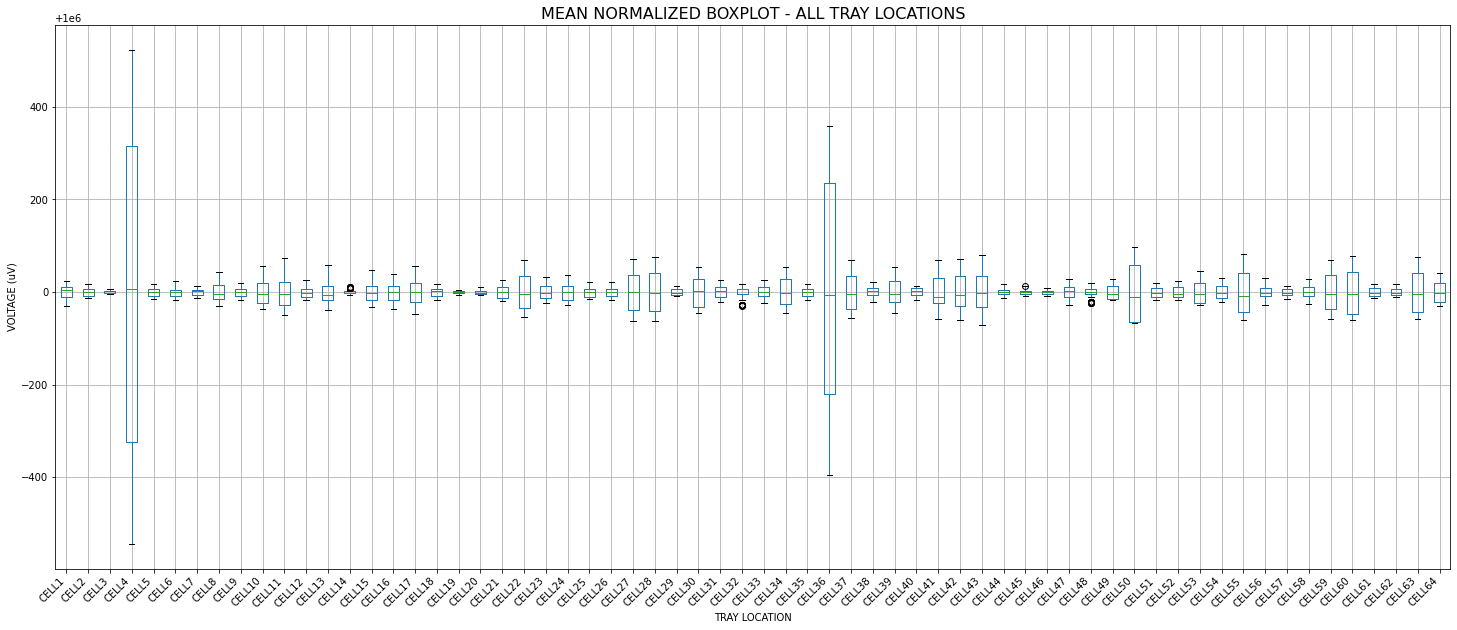

In [166]:
boxplot = celldata.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - ALL TRAY LOCATIONS', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();


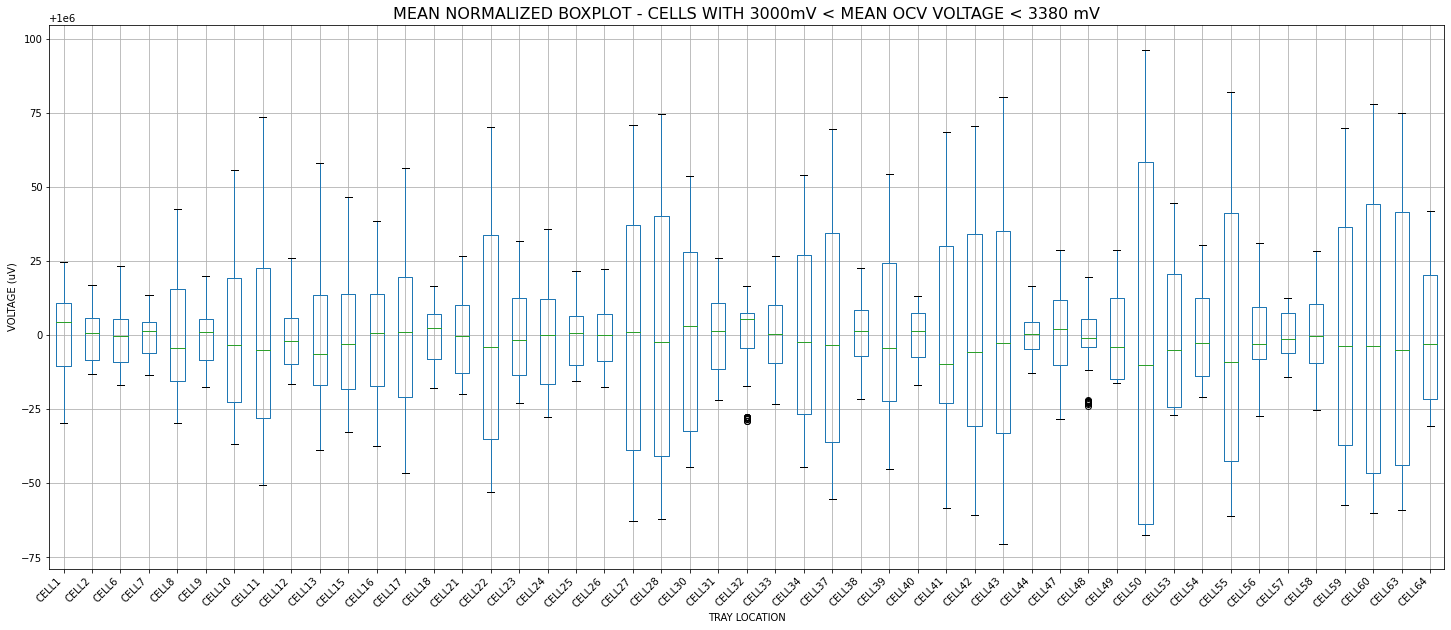

In [164]:
indexFilterList = []

for value in meanList:
    if value < 3.38 and value > 3.0:
        indexFilterList.append("CELL" + str(meanList.index(value)+1))
        
boxplot = celldata.boxplot(column=indexFilterList, figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - CELLS WITH 3000mV < MEAN OCV VOLTAGE < 3380 mV', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

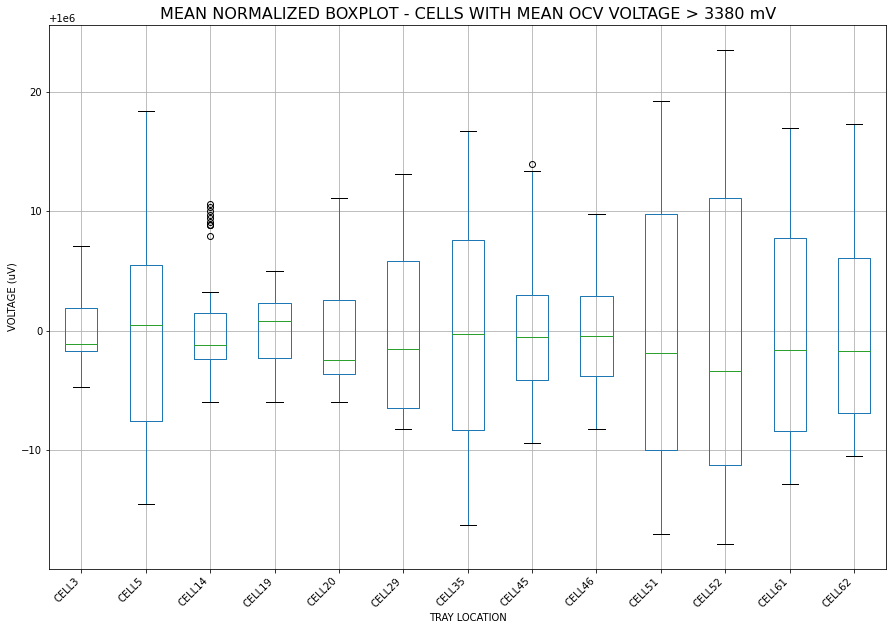

In [167]:
indexFilterList = []

for value in meanList:
    if value > 3.38:
        indexFilterList.append("CELL" + str(meanList.index(value)+1))
        
boxplot = celldata.boxplot(column=indexFilterList, figsize=(15,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - CELLS WITH MEAN OCV VOLTAGE > 3380 mV', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

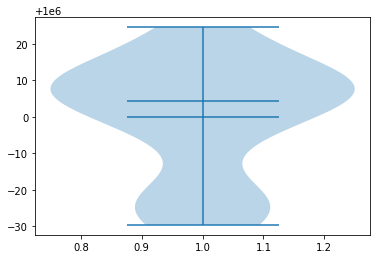

In [152]:
plt.violinplot([celldata.CELL1], showmeans=True, showmedians=True);

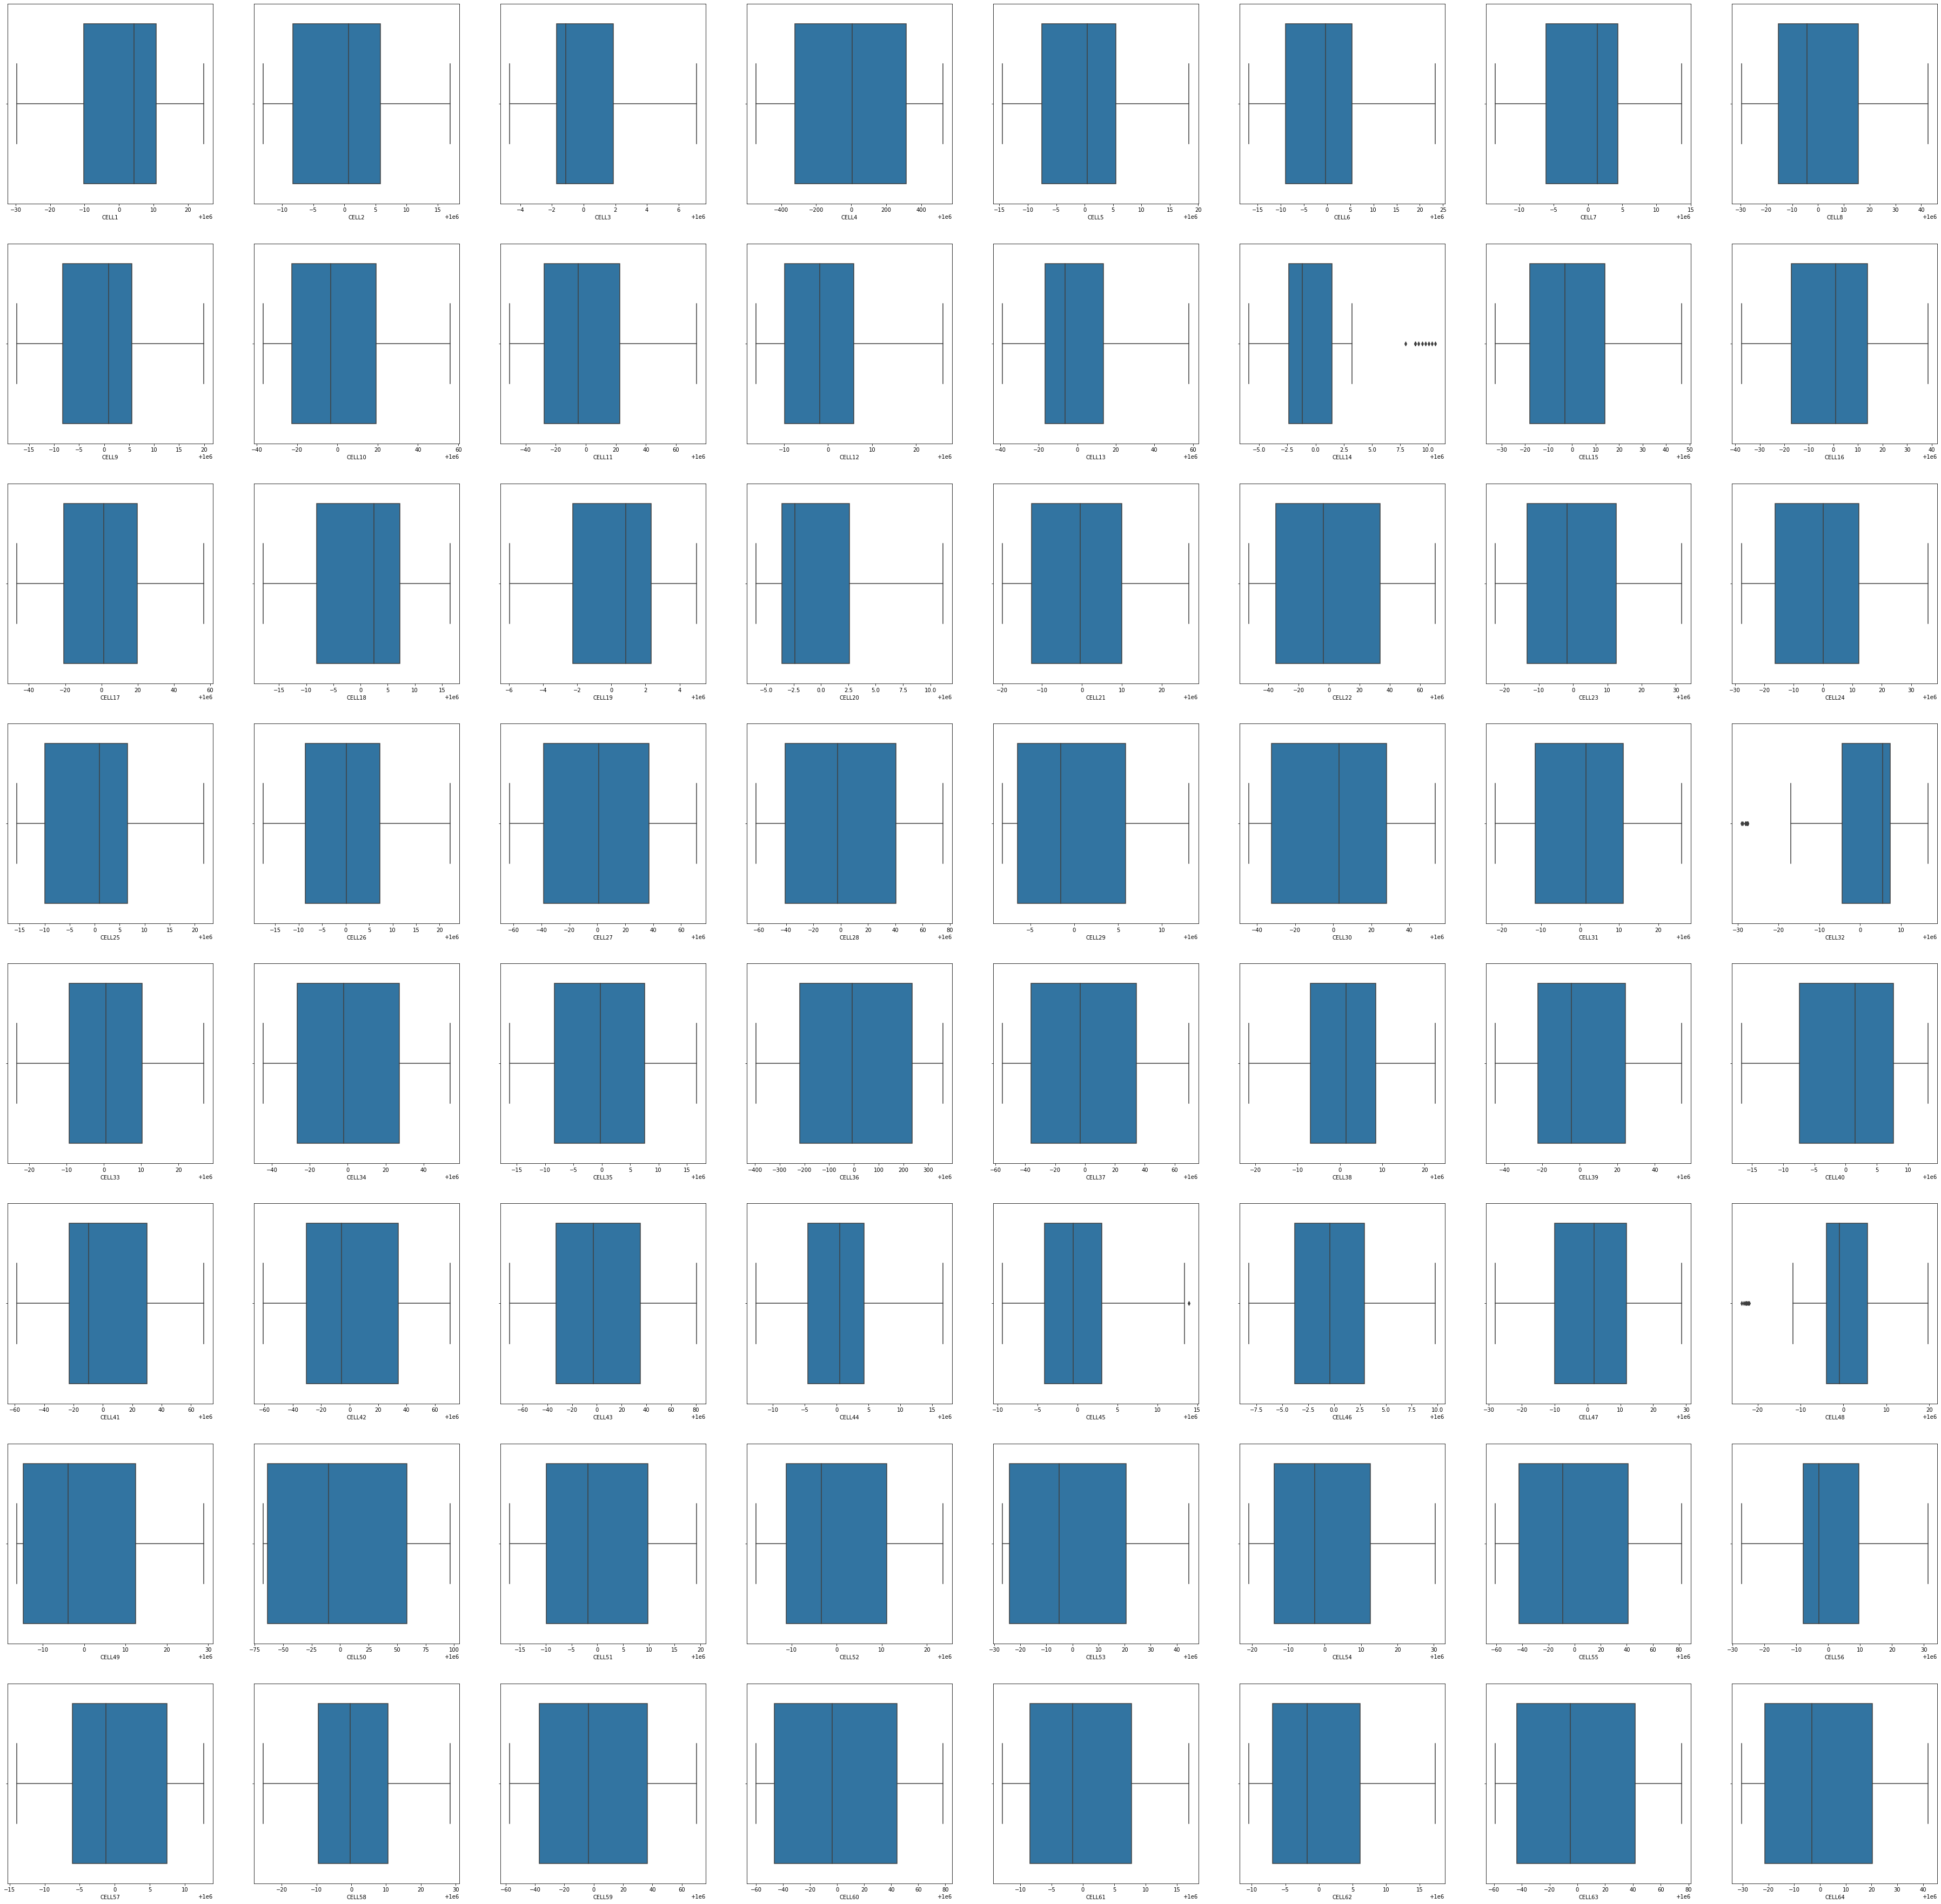

In [157]:
names = list(celldata.columns)

f, axes = plt.subplots(round(len(names)/8), 8, figsize=(64, 64)) 

y = 0;
for name in names:
    i, j = divmod(y, 8)
    sns.boxplot(x=celldata[name], ax=axes[i, j])
    y = y + 1

plt.show()